In [49]:
import numpy as np
import pandas as pd
import os

In [50]:
# Dictionary to store image paths
image_paths = {
    "train_cataract": [],
    "train_normal": [],
    "test_cataract": [],
    "test_normal": []
}

# Walk through the directory
for dirname, _, filenames in os.walk('data'):
    for filename in filenames:
        path = os.path.join(dirname, filename)
        if "train\\cataract" in path:
            image_paths["train_cataract"].append(path)
        elif "train\\normal" in path:
            image_paths["train_normal"].append(path)
        elif "test\\cataract" in path:
            image_paths["test_cataract"].append(path)
        elif "test\\normal" in path:
            image_paths["test_normal"].append(path)

In [51]:
len(image_paths["train_normal"])

250

In [52]:
from PIL import Image
from matplotlib import pyplot as plt

size of image : (512, 512, 3)


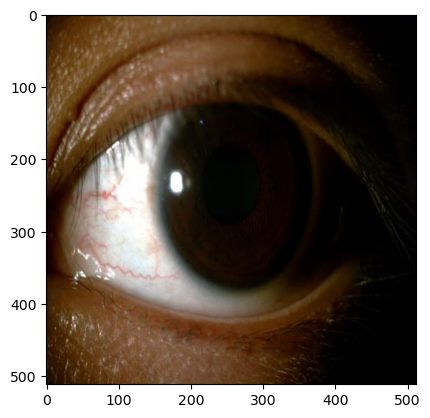

In [53]:
sample_img = np.array(Image.open(image_paths["test_normal"][1]))
print(f"size of image : {np.shape(sample_img)}")
plt.imshow(sample_img)

size of image : (200, 200, 3)


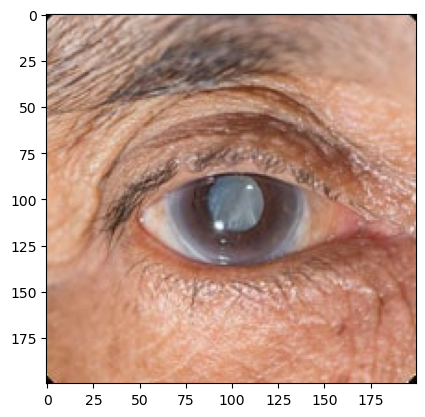

In [54]:
sample_img = np.array(Image.open(image_paths["test_cataract"][0]))
print(f"size of image : {np.shape(sample_img)}")
plt.imshow(sample_img)

In [55]:
training_dir = "data\\train\\"
image_size = (55, 94, 3)
target_size = (55, 94)

In [56]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [57]:
train_datagen = ImageDataGenerator(
    rescale=1/255,
    rotation_range=10,
    horizontal_flip=True,
    zoom_range=0.5 

)
train_generator = train_datagen.flow_from_directory(
    training_dir,
    target_size = target_size,
    class_mode = 'binary'
)

Found 689 images belonging to 2 classes.


In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers.experimental import RMSprop

In [59]:
model = Sequential([
    # Convolutional Neural Network (CNN) for feature extraction
    Conv2D(32, (3, 3), activation='relu', input_shape=image_size),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    # Dense Neural Network (DNN) for classification
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [60]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 53, 92, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 26, 46, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 44, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 12, 22, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 10, 20, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 10, 128)       

In [61]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer=RMSprop(learning_rate=0.001),
    metrics=['accuracy']
)

In [62]:
from keras.callbacks import EarlyStopping

In [63]:
early_stop = EarlyStopping(monitor='accuracy', patience=5)

history = model.fit(
    train_generator,
    epochs=30,
    callbacks=[early_stop]
)

Epoch 1/30
 1/22 [>.............................] - ETA: 36s - loss: 0.6914 - accuracy: 0.5938

c:\Users\yudha\anaconda3\Lib\site-packages\PIL\Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


22/22 [==============================] - 8s 298ms/step - loss: 0.6974 - accuracy: 0.6197
Epoch 2/30
22/22 [==============================] - 7s 310ms/step - loss: 0.6930 - accuracy: 0.6575
Epoch 3/30
22/22 [==============================] - 7s 314ms/step - loss: 0.5698 - accuracy: 0.7097
Epoch 4/30
22/22 [==============================] - 7s 320ms/step - loss: 0.4947 - accuracy: 0.7750
Epoch 5/30
22/22 [==============================] - 7s 316ms/step - loss: 0.4621 - accuracy: 0.7765
Epoch 6/30
22/22 [==============================] - 7s 308ms/step - loss: 0.4470 - accuracy: 0.8012
Epoch 7/30
22/22 [==============================] - 8s 341ms/step - loss: 0.3916 - accuracy: 0.8345
Epoch 8/30
22/22 [==============================] - 8s 325ms/step - loss: 0.3920 - accuracy: 0.8433
Epoch 9/30
22/22 [==============================] - 7s 338ms/step - loss: 0.3751 - accuracy: 0.8389
Epoch 10/30
22/22 [==============================] - 8s 378ms/step - loss: 0.3312 - accuracy: 0.8621
Epoch 11/3

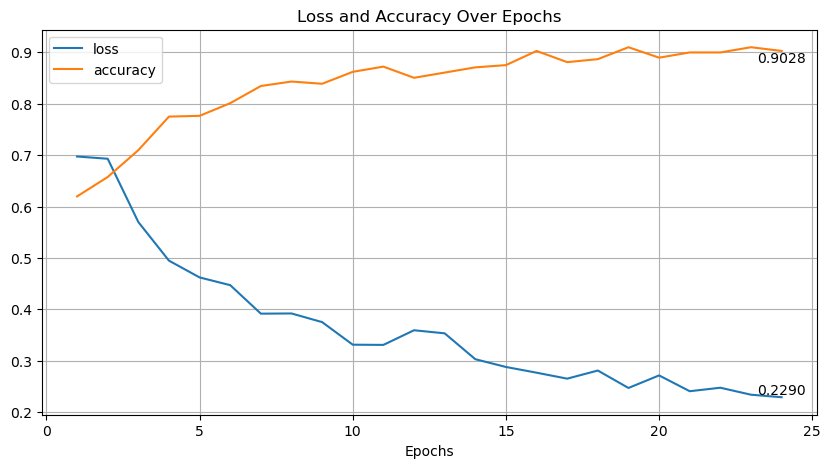

In [81]:
epochs = range(1, len(history.history['loss']) + 1)
plt.figure(figsize=(10, 5))
plt.title("Loss and Accuracy Over Epochs")
plt.plot(epochs, history.history['loss'], label='loss')
plt.plot(epochs, history.history['accuracy'], label='accuracy')

if 'stopped_epoch' in history.history:
    stopped_epoch = history.history['stopped_epoch']
    plt.axvline(x=stopped_epoch, color='r', linestyle='--', label='Early Stopping')

plt.text(len(epochs), history.history['loss'][-1], f'{history.history["loss"][-1]:.4f}', ha='center', va='bottom', color='black', fontsize='medium')
plt.text(len(epochs), history.history['accuracy'][-1], f'{history.history["accuracy"][-1]:.4f}', ha='center', va='top', color='black', fontsize='medium')

plt.xlabel("Epochs")
plt.grid()
plt.legend()
plt.show()

In [66]:
from keras.preprocessing import image

In [67]:
label = train_generator.class_indices
print(label)

{'cataract': 0, 'normal': 1}


1/1 [==============================] - 0s 125ms/step
actual class : cataract
predicted class : cataract


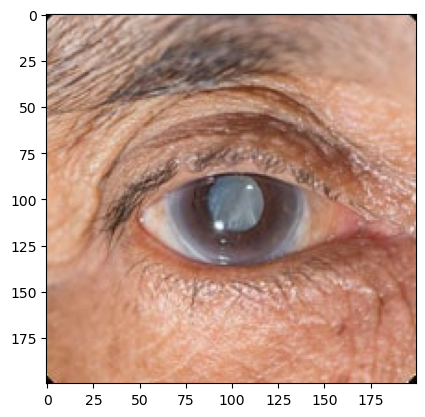

In [68]:
path = image_paths["test_cataract"][0]
img = Image.open(path)
plt.imshow(np.array(img))
img = np.array(img.resize((94, 55)))
img = np.expand_dims(img, axis=0)
pred = model.predict(img)
print("actual class : cataract")
print(f"predicted class : {'normal' if pred[0] > 0.5 else 'cataract'}")

1/1 [==============================] - 0s 29ms/step
actual class : normal
predicted class : normal


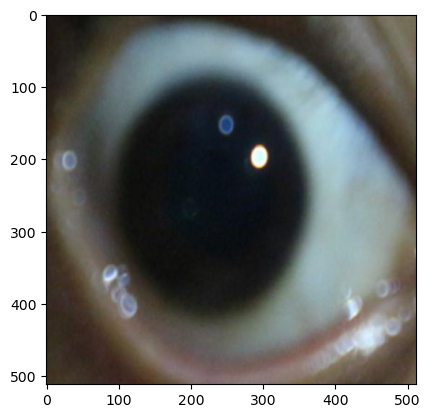

In [70]:
path = image_paths["test_normal"][4]
img = Image.open(path)
plt.imshow(np.array(img))
img = np.array(img.resize((94, 55)))
img = np.expand_dims(img, axis=0)
pred = model.predict(img)
print("actual class : normal")
print(f"predicted class : {'normal' if pred[0] > 0.5 else 'cataract'}")

In [71]:
def _predict(model, path):
    img = np.array(Image.open(path).resize((94, 55)))
    img = np.expand_dims(img, axis=0)
    pred = model.predict(img)
    if pred[0] > 0.5:
        return 'normal'
    else:
        return 'cataract'

In [72]:
def evaluate(model, normal_path, cataract_path):
    normal_pred = []
    cataract_pred = []
    for normal, cataract in zip(normal_path, cataract_path):
        res_cataract = _predict(model, cataract)
        cataract_pred.append(res_cataract)
        
        res_normal = _predict(model, normal)
        normal_pred.append(res_normal)
    
    return normal_pred, cataract_pred

In [73]:
both_size = min(len(image_paths["test_normal"]), len(image_paths["test_cataract"]))
cataract_test_path = image_paths["test_cataract"][:both_size]
normal_test_path = image_paths["test_normal"][:both_size]
normal_pred, cataract_pred = evaluate(model, image_paths["test_normal"], image_paths["test_cataract"])

1/1 [==============================] - 0s 39ms/step


In [74]:
pred_df = pd.DataFrame()
pred_df["relative_path"] = normal_test_path + cataract_test_path
pred_df["actual_class"] = ["normal"]*len(normal_test_path) + ["cataract"]*len(cataract_test_path)
pred_df["predicted_class"] = normal_pred + cataract_pred

In [75]:
pred_df.tail(40)

,relative_path,actual_class,predicted_class
0,data\test\normal\normal (119).jpg,normal,normal
1,data\test\normal\normal (120).jpg,normal,cataract
2,data\test\normal\normal (175).jpg,normal,normal
3,data\test\normal\normal (176).jpg,normal,normal
4,data\test\normal\normal (204).jpg,normal,normal
5,data\test\normal\normal (23).jpeg,normal,normal
6,data\test\normal\normal (236).jpg,normal,normal
7,data\test\normal\normal (24).jpeg,normal,normal
8,data\test\normal\normal (247).jpg,normal,cataract
9,data\test\normal\normal (25).jpeg,normal,normal


In [76]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

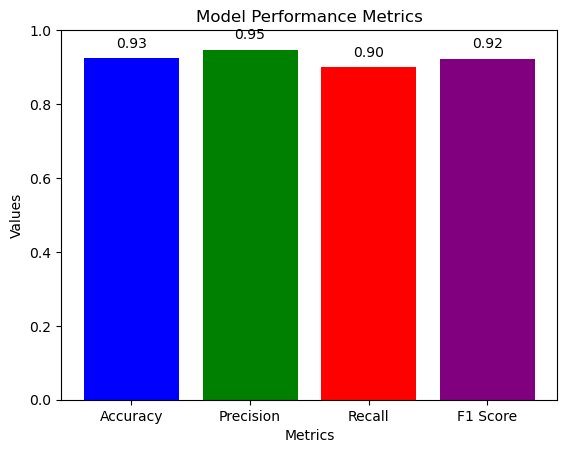

In [77]:
y_true = pred_df['actual_class']
y_pred = pred_df['predicted_class']

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, pos_label='normal')
recall = recall_score(y_true, y_pred, pos_label='normal')
f1 = f1_score(y_true, y_pred, pos_label='normal')

# Create a bar plot
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple'])
plt.title('Model Performance Metrics')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.ylim(0, 1)  
for i, value in enumerate(values):
    plt.text(i, value + 0.02, f'{value:.2f}', ha='center', va='bottom', color='black', fontweight='medium')
plt.show()

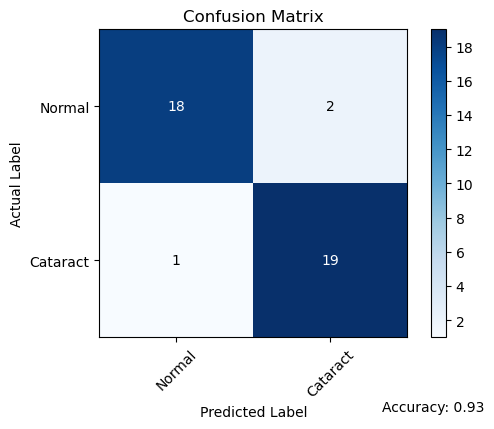

In [78]:
# Extracting actual and predicted labels from the DataFrame
y_true = pred_df['actual_class']
y_pred = pred_df['predicted_class']

# Creating the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred, labels=['normal', 'cataract'])
tn, fp, fn, tp = conf_matrix.ravel()

# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

classes = ['Normal', 'Cataract']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

# Displaying the values in each cell
for i in range(len(classes)):
    for j in range(len(classes)):
        color = 'black' if (i == 0 and j == 1) or (i == 1 and j == 0) else 'white'
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color=color)

plt.text(2, 2, f'Accuracy: {accuracy:.2f}', ha='right', va='bottom', color='black', fontweight='medium')

plt.show()

In [ ]:
#model.save('cataract_detection.h5')